<a href="https://colab.research.google.com/github/WilliamAshbee/splineexample/blob/main/LSTM_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

"""import torch
import torch.nn as nn
from torch.hub import load_state_dict_from_url

class GRU_P(nn.Module):
    def __init__(self):
        super(GRU_P, self).__init__()
        self.rnn = nn.GRU(64, 64, 64)#input, output,

        self.hiddenmlp = nn.Sequential(nn.Linear(1024,256),nn.ReLU(True),nn.Dropout(),
                                       nn.Linear(256,64),nn.ReLU(True)) 
        self.inputmlp = nn.Sequential(nn.Linear(1024,256),nn.ReLU(True),nn.Dropout(),
                                       nn.Linear(256,64),nn.ReLU(True)) 
        self.inputmlphx = nn.Sequential(nn.Linear(64,64),nn.ReLU(True),nn.Dropout(),nn.Linear(64,64),nn.Sigmoid()) 
        self.mlp = nn.Sequential(
            nn.Linear(64, 32),
            nn.ReLU(True),
            nn.Dropout(),
            nn.Linear(32, 2),
            nn.Sigmoid()
        )
    def forward(self, x, hidden):
        
        indim= x.shape[0]
        x = self.inputmlp(torch.flatten(x,start_dim=1))
        x = x.reshape(indim,1,64)
        hidden = hidden.reshape(indim,1024)
        hidden = self.hiddenmlp(hidden)
        #print('1')
        h = hidden.reshape(indim,1,64)
        points = torch.zeros(indim,10,2).cuda()
        for i in range(10):

          inrnn = torch.flatten(h,start_dim=1)
          #print(inrnn.shape)
          inrnn = self.inputmlphx(inrnn)
          inrnn = (x.reshape(indim,64)*inrnn.reshape(indim,64))
          out, h = self.rnn(inrnn.reshape(indim,1,64),h)
          out = self.mlp(torch.flatten(out,start_dim=1))
          points[:,i,:] = out
        #print(out.shape,h.shape)
        
        #print(h.shape)
        #assert out.shape == (indim,1,1024)
        return 32.0*points 
"""

"import torch\nimport torch.nn as nn\nfrom torch.hub import load_state_dict_from_url\n\nclass GRU_P(nn.Module):\n    def __init__(self):\n        super(GRU_P, self).__init__()\n        self.rnn = nn.GRU(64, 64, 64)#input, output,\n\n        self.hiddenmlp = nn.Sequential(nn.Linear(1024,256),nn.ReLU(True),nn.Dropout(),\n                                       nn.Linear(256,64),nn.ReLU(True)) \n        self.inputmlp = nn.Sequential(nn.Linear(1024,256),nn.ReLU(True),nn.Dropout(),\n                                       nn.Linear(256,64),nn.ReLU(True)) \n        self.inputmlphx = nn.Sequential(nn.Linear(64,64),nn.ReLU(True),nn.Dropout(),nn.Linear(64,64),nn.Sigmoid()) \n        self.mlp = nn.Sequential(\n            nn.Linear(64, 32),\n            nn.ReLU(True),\n            nn.Dropout(),\n            nn.Linear(32, 2),\n            nn.Sigmoid()\n        )\n    def forward(self, x, hidden):\n        \n        indim= x.shape[0]\n        x = self.inputmlp(torch.flatten(x,start_dim=1))\n        

In [2]:
#create image of circle, log values of theta or scaled [0,1]

x0_y0_r_xrf_yrf torch.Size([100, 1]) torch.Size([100, 1]) torch.Size([100, 1000]) torch.Size([1, 1000]) torch.Size([1, 1000])


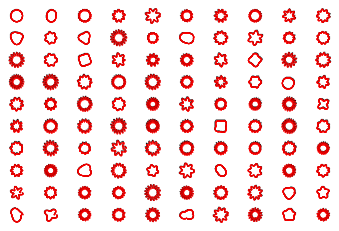

In [3]:
import torch
import numpy as np
import pylab as plt
from skimage import filters
import math

global numpoints
numpoints = 1000
side = 32

rows = torch.zeros(32,32)
columns = torch.zeros(32,32)


for i in range(32):
    columns[:,i] = i
    rows[i,:] = i


def donut_matrix(length = 10):
    radiusMax = side /3
    w = 1
    sigmas = [None, 1]
    
    canvas = torch.zeros((length,side, side))
    r0 = torch.tensor(np.random.uniform(side/4, side/3, length))

    radii = torch.zeros((length,numpoints))
    radii[:, :] = r0.unsqueeze(1)
    
    ind = [x for x in range(numpoints)]

    theta = torch.FloatTensor(ind)
    theta *= math.pi*2.0/(float)(numpoints)
    
    for i in range(1,length):
        a = np.random.uniform(1.0,3.0)*torch.sin(np.random.uniform(20.0)*theta+np.random.uniform(1000.0))
        #a = 4.0*torch.sin(10.0*theta)
        #print(a.shape,torch.max(a))
        radii[i,:] += a
        #print(radii.shape, torch.max(radii))
    
    assert torch.min(radii)>0
    #print(radii.max(axis = 0)[0].shape)
    rmaxs = radii.max(axis = 1)[0]
    pmins = rmaxs+1.0
    pmaxs = side-rmaxs-1.0
    x0 = np.random.uniform(pmins,pmaxs)
    y0 = np.random.uniform(pmins,pmaxs)
    x0[:]=side/2
    y0[:]=side/2
    x0 = torch.tensor(x0)
    y0 = torch.tensor(y0)
    
    x0 = x0.unsqueeze(1)
    y0 = y0.unsqueeze(1)
    #radii = torch.from_numpy(radii)
    xrfactors = torch.cos(theta).unsqueeze(0)
    yrfactors = torch.sin(theta).unsqueeze(0)
    
    print('x0_y0_r_xrf_yrf',x0.shape,y0.shape,radii.shape,xrfactors.shape,yrfactors.shape)

    x = (x0+(xrfactors*radii))
    y = (y0+(yrfactors*radii))
    assert x.shape == (length,numpoints)
    assert y.shape == (length,numpoints)
    assert torch.sum(x[x>(side-1)])==0 
    assert torch.sum(x[x<0])==0 
    assert torch.sum(y[y>(side-1)])==0 
    assert torch.sum(y[y<0])==0 
    
    points = torch.zeros(length,numpoints,2)
    for l in range(length):
        canvas[l,y[l,:].type(torch.LongTensor),x[l,:].type(torch.LongTensor)]=1.0
        points[l,:,0] = x[l,:]#modified for lstm discriminator
        points[l,:,1] = y[l,:]#modified for lstm discriminator 
    
    
    return {
        'canvas': canvas, 
        'points':points.type(torch.FloatTensor)}


def plot_all( sample = None, model = None, labels = None):
    img = sample[:,:].squeeze().cpu().numpy()
    #img = img.T
    plt.imshow(img, cmap=plt.cm.gray_r)
    if model != None:
        with torch.no_grad():
            global numpoints
            print(labels.shape,sample.shape)
            sample = torch.stack([sample for i in range(2)],dim = 0).cuda()
            labels = torch.stack([labels for i in range(2)],dim = 0).cuda()
            pred = model(sample.cuda(),labels.cuda())#come back to this
            predres = numpoints
            print('pred',pred.shape)
            X = pred[0,:,0]
            Y = pred[0,:,1]
            
            s = [.001 for x in range(predres)]
            
            assert len(s) == predres
            c = ['red' for x in range(predres)]
            assert len(c) == predres
            Y = Y.cuda()
            X = X.cuda()
            #print("type",type(X))
            ascatter = plt.scatter(X.cpu().numpy(),Y.cpu().numpy(),s = s,c = c)
            plt.gca().add_artist(ascatter)
    else:
        #print(labels.shape)
        X = labels[:,0]
        Y = labels[:,1]
        #print(X.shape)
        #print(Y.shape)
        s = [.001 for x in range(numpoints)]
        #print(len(s))
        c = ['red' for x in range(numpoints)]
        #print(len(c))
        ascatter = plt.scatter(X.cpu().numpy(),Y.cpu().numpy(),s = s,c = c)
        plt.gca().add_artist(ascatter)

class DonutDataset(torch.utils.data.Dataset):
    """Donut dataset."""
    def __init__(self, length = 10):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.length = length
        self.values = donut_matrix(length)
        assert self.values['canvas'].shape[0] == self.length
        assert self.values['points'].shape[0] == self.length
        
        count = 0
        for i in range(self.length):
          a = self[i]
          c = a[0]
          for el in a[1]:
            #print(c[(int)(el[1]),(int)(el[0])].item())
            #assert c[(int)(el[1]),(int)(el[0])].item() == 1
            y,x = (int)(el[1]),(int)(el[0])
            if x < side-2 and x > 2 and y < side-2 and y > 2: 
              if c[y,x] != 1 and \
                c[y+1,x] != 1 and c[y+1,-1+x] != 1 and c[y+1,1+x] != 1 and \
                c[y-1,x] != 1 and c[y,-1+x] != 1 and c[y,1+x] != 1:
                count+=1
        assert count ==0
    def __len__(self):
        return self.length


    def __getitem__(self, idx):
        canvas = self.values["canvas"]
        
        canvas = canvas[idx,:,:]
        assert canvas.shape == (side,side)
        
        points = self.values["points"]
        points = points[idx,:]
        #points = points.unsqueeze(1)
        z = torch.zeros(numpoints,1)
        #print(z.shape)
        points = torch.cat([points,z], dim = 1)
        
        #print('points', points.shape)
        return canvas, points
    
    @staticmethod
    def displayCanvas(title,dataset, model):
        #model.setBatchSize(batch_size = 1)
        for i in range(100):
            sample, labels = dataset[i]
            plt.subplot(10,10,i+1)
            plot_all(sample = sample,model=model, labels = labels)
            plt.axis('off')
        plt.savefig(title,dpi=600)

dataset = DonutDataset(length = 100)

DonutDataset.displayCanvas('donut.png',dataset, model = None)


In [4]:
a = torch.zeros(32,32)

a = torch.stack([a,a],dim=0)
print(a.shape)

torch.Size([2, 32, 32])


In [5]:

from torch.utils import data
from torch.utils.data import DataLoader, TensorDataset, RandomSampler

mini_batch = 64
test_dataset = DonutDataset(length = 64)
loader_test = data.DataLoader(
    test_dataset, 
    batch_size=mini_batch,
    sampler=RandomSampler(data_source=test_dataset),
    num_workers=4)


x0_y0_r_xrf_yrf torch.Size([64, 1]) torch.Size([64, 1]) torch.Size([64, 1000]) torch.Size([1, 1000]) torch.Size([1, 1000])


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [6]:

from torch.utils import data
from torch.utils.data import DataLoader, TensorDataset, RandomSampler

mini_batch = 64
dataset = DonutDataset(length = 64*20)
loader_train = data.DataLoader(
    dataset, 
    batch_size=mini_batch,
    sampler=RandomSampler(data_source=dataset),
    num_workers=4)


x0_y0_r_xrf_yrf torch.Size([1280, 1]) torch.Size([1280, 1]) torch.Size([1280, 1000]) torch.Size([1, 1000]) torch.Size([1, 1000])


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


I think I need to give the model the first x0,y0 coordinate in addition to all the other information.

Ablation:\
Network depth helps\
Network width helps\
Probably lower learning rate and long running times helps \
\
note:\
worth noting one of the ameba columns always starts at the same place

In [7]:
import torch
import torch.nn as nn
from torch.hub import load_state_dict_from_url

class DecoderRNN(nn.Module):
    def __init__(self):
        super(DecoderRNN, self).__init__()
        
        # define the properties
        self.embed_size = 2
        self.hidden_size = 512+2
        self.num_layers = 1
        # lstm cell
        self.lstm_cell = nn.LSTM(self.embed_size, self.hidden_size,self.num_layers)
    
        self.fc_out = nn.Sequential(
            nn.Linear(self.hidden_size,2),
            nn.Sigmoid()
        )
        # embedding layer
        #self.embed = nn.Embedding(num_embeddings=self.vocab_size, embedding_dim=self.embed_size)
        #self.embed = nn

        

        self.hiddenMlp = nn.Sequential(
            nn.Linear(1024+2,self.hidden_size),nn.ReLU())
        self.cellMlp = nn.Sequential(
            nn.Linear(1024+2,self.hidden_size),nn.ReLU())
            
        
    def forward(self, features, captions):
        
        #print(features.shape,captions.shape)
        # batch size
        #lvector = self.inputmlp(torch.flatten(features,start_dim=1))
        p0 = torch.flatten(captions[:,0,:2],start_dim=1)

        batch_size = features.size(0)
                
        # init the hidden and cell states to zeros
        #h_0 of shape (num_layers * num_directions, batch, hidden_size)
        h0 = self.hiddenMlp(torch.cat([torch.flatten(features,start_dim=1),p0],dim=1)).reshape(self.num_layers,batch_size, self.hidden_size)
        c0 = self.cellMlp(torch.cat([torch.flatten(features,start_dim=1),p0],dim=1)).reshape(self.num_layers,batch_size, self.hidden_size)
        #hidden_state = torch.zeros((self.num_layers,batch_size, self.hidden_size)).cuda()
        #cell_state = torch.zeros((self.num_layers,batch_size, self.hidden_size)).cuda()

        
        # define the output tensor placeholder
        assert captions.size(1)==1000
        #assert self.vocab_size == 2
        outputs = torch.empty((batch_size, captions.size(1), 2)).cuda()
        
        #output, (hidden_state, cell_state) = self.lstm_cell(features, (hidden_state, cell_state))
            
        # pass the caption word by word
        for t in range(captions.size(1)):
        
            # for the first time step the input is the feature vector
            if t == 0:
                
                #b = torch.cat([lvector,p0],dim=1)
                #print(b.shape)
                output, (hidden_state, cell_state) = self.lstm_cell(p0.unsqueeze(0), (h0, c0))
            else:
                #print('3')
        
                pt = torch.flatten(captions[:,t-1,:2],start_dim=1)
                #b = torch.cat([lvector,pt],dim=1)
                output, (hidden_state, cell_state) = self.lstm_cell(pt.unsqueeze(0), (hidden_state, cell_state))
                
            out = self.fc_out(torch.flatten(torch.squeeze(output),start_dim=1))
            
            # build the output tensor
            outputs[:, t, :] = out
    
        return 32.0*outputs

In [8]:
model = None

In [9]:

model = DecoderRNN().cuda()

In [10]:

optimizer = torch.optim.Adam(model.parameters(),lr = 0.0001, betas = (.9,.999))#ideal


In [11]:
for i in range (5):
  loss = None
  for x,y in loader_train:
    x = x.cuda()
    y = y.cuda()
    
    optimizer.zero_grad()
    #print(x.shape,y.shape)
    out = model(x,y[:,:,:2])
    loss = torch.mean((out-y[:,:,:2])**2)
    loss.backward()
    optimizer.step()
    #print(y[:,0,:2])
    print('i',i)
    print(loss)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


i 0
tensor(46.0645, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(43.6983, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(44.1981, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(39.3024, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(37.3554, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(35.6677, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(32.7592, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(31.1764, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(29.9535, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(28.1108, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(26.2182, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(24.6307, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(22.8929, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(21.3790, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(19.2669, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(18.2024, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tens

In [12]:
optimizer = torch.optim.Adam(model.parameters(),lr = 0.00001, betas = (.9,.999))#ideal


In [13]:
for i in range (5):
  loss = None
  for x,y in loader_train:
    x = x.cuda()
    y = y.cuda()
    
    optimizer.zero_grad()
    #print(x.shape,y.shape)
    out = model(x,y[:,:,:2])
    loss = torch.mean((out-y[:,:,:2])**2)
    loss.backward()
    optimizer.step()
    #print(y[:,0,:2])
    print('i',i)
    print(loss)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


i 0
tensor(0.2770, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(0.2997, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(0.2857, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(0.2982, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(0.2613, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(0.2861, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(0.2990, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(0.2657, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(0.2929, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(0.2709, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(0.2905, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(0.2877, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(0.2692, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(0.2364, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(0.2605, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(0.3277, device='cuda:0', grad_fn=<MeanBackward0>)
i 0
tensor(0.3140, devic

In [14]:
loss = None
for x,y in loader_test:
  x = x.cuda()
  y = y.cuda()
  
  out = model(x,y[:,:,:2])
  loss = torch.mean((out-y[:,:,:2])**2)
  loss.backward()
  print('i',i)
  print('test loss', loss.item())

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


i 4
test loss 0.18091319501399994


x0_y0_r_xrf_yrf torch.Size([100, 1]) torch.Size([100, 1]) torch.Size([100, 1000]) torch.Size([1, 1000]) torch.Size([1, 1000])
torch.Size([1000, 3]) torch.Size([32, 32])
pred torch.Size([2, 1000, 2])
torch.Size([1000, 3]) torch.Size([32, 32])
pred torch.Size([2, 1000, 2])
torch.Size([1000, 3]) torch.Size([32, 32])
pred torch.Size([2, 1000, 2])
torch.Size([1000, 3]) torch.Size([32, 32])
pred torch.Size([2, 1000, 2])
torch.Size([1000, 3]) torch.Size([32, 32])
pred torch.Size([2, 1000, 2])
torch.Size([1000, 3]) torch.Size([32, 32])
pred torch.Size([2, 1000, 2])
torch.Size([1000, 3]) torch.Size([32, 32])
pred torch.Size([2, 1000, 2])
torch.Size([1000, 3]) torch.Size([32, 32])
pred torch.Size([2, 1000, 2])
torch.Size([1000, 3]) torch.Size([32, 32])
pred torch.Size([2, 1000, 2])
torch.Size([1000, 3]) torch.Size([32, 32])
pred torch.Size([2, 1000, 2])
torch.Size([1000, 3]) torch.Size([32, 32])
pred torch.Size([2, 1000, 2])
torch.Size([1000, 3]) torch.Size([32, 32])
pred torch.Size([2, 1000, 2]

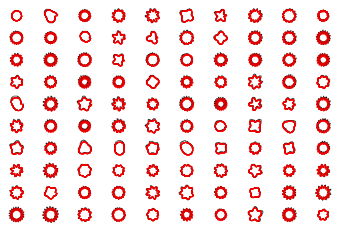

In [15]:
dataset = DonutDataset(length = 100)
model = model.eval()
DonutDataset.displayCanvas('test-set.png',dataset, model = model)

